In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from numpy import sqrt
from itertools import cycle
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['legend.fontsize'] = 12
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.model_selection import KFold
from sklearn import preprocessing, svm, metrics as m
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression

# 1. Use K-Fold Cross Validation com k = 5 para resolver os seguintes problemas de machine learning: 

Regressão

    Dataset: boston house-prices dataset
    
    Aplicar Standardization nas features.
    
    Comparar os resultados dos seguintes algoritmos: Gradient Descent, Linear Regression, kNN, Naive Bayes, SVM
    
    Usar as seguintes métricas: RMSE, MAE
    
    Escolher a melhor técnica e criar um modelo final usando todo o dataset para treinar o modelo.

In [2]:
X_boston, y_boston = load_boston(return_X_y=True)

#print(X_boston)
#print(y_boston)

train = KFold(n_splits=5, shuffle=True, random_state=42)
train.get_n_splits(X_boston, y_boston)

#print(train)

for train_index, test_index in train.split(X_boston, y_boston):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_boston[train_index], X_boston[test_index]
    y_train, y_test = y_boston[train_index], y_boston[test_index]
    
std_scale = preprocessing.StandardScaler().fit(X_train, y_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [3]:
# Gradient Descent
sgd = SGDRegressor().fit(X_train_std, y_train)
y_pred_sgd = sgd.predict(X_test_std)
rmse_sgd = sqrt(m.mean_squared_error(y_test, y_pred_sgd))
mae_sgd = m.mean_absolute_error(y_test, y_pred_sgd)

# Linear Regression
lr = LinearRegression().fit(X_train_std, y_train)
y_pred_lr = lr.predict(X_test_std)
rmse_lr = sqrt(m.mean_squared_error(y_test, y_pred_lr))
mae_lr = m.mean_absolute_error(y_test, y_pred_lr)

#KNN Regressor
knnR = KNeighborsRegressor().fit(X_train_std, y_train)
y_pred_knnR = knnR.predict(X_test_std)
rmse_knnR = sqrt(m.mean_squared_error(y_test, y_pred_knnR))
mae_knnR = m.mean_absolute_error(y_test, y_pred_knnR)

#Naive Bayes
#gnb = GaussianNB().fit(X_train_std, y_train)

#SVM
svr = svm.SVR(kernel='linear', C=1, gamma='auto').fit(X_train_std, y_train)
y_pred_svr = svr.predict(X_test_std)
rmse_svr = sqrt(m.mean_squared_error(y_test, y_pred_svr))
mae_svr = m.mean_absolute_error(y_test, y_pred_svr)

#print("Gradient Descent: MSE = {} and RMSE = {}".format(mse_sgd, mse_sgd ** 1/2))
#print("Linear Regression: MSE = {} and RMSE = {}".format(mse_lr, mse_lr ** 1/2))
#print("KNN Regressor: MSE = {} and RMSE = {}".format(mse_knnR, mse_knnR ** 1/2))
#print("E-S V Regression: MSE = {} and RMSE = {}".format(mse_svr, mse_svr ** 1/2))

In [4]:
class_names = ['SGD','LR','KnnR','SVR']
class_ = [rmse_sgd, rmse_lr, rmse_knnR, rmse_svr]
class_1 = [mae_sgd, mae_lr, mae_knnR, mae_svr]
for i in range(0,len(class_names)):
    print(class_names[i] + ': RMSE = ' + str(class_[i]) + ' - MAE = ' + str(class_1[i]))

SGD: RMSE = 4.67528091812 - MAE = 2.98492426108
LR: RMSE = 4.74344207319 - MAE = 3.18797688188
KnnR: RMSE = 4.71944744207 - MAE = 2.8900990099
SVR: RMSE = 4.79653906067 - MAE = 2.84638466812


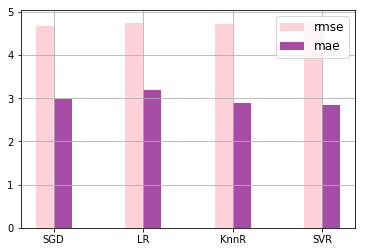

In [5]:
grupos = len(class_names)
indice = np.arange(grupos)
bar_larg = 0.2
transp = 0.7

plt.grid()
plt.bar(indice, class_, bar_larg, alpha=transp, color='pink', label='rmse')
plt.bar(indice + bar_larg, class_1, bar_larg, alpha=transp, color='purple', label='mae')

plt.xticks(indice + bar_larg / 2, class_names)
plt.legend()

In [6]:
# COMO SGD FOI MELHOR
SGD_final = SGDRegressor().fit(X_boston, y_boston)
SGD_final

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

Classificação

    Dataset: breast cancer wisconsin dataset
    
    Aplicar Normalization nas features.
    
    Comparar os resultados dos seguintes algoritmos: Logistic Regression, kNN, Naive Bayes, SVM
    
    Mostrar a matriz de confusão
    
    Usar as seguintes métricas: Accuracy, Precision, Recall, F1-Measure, AOC
    
    Plotar curva ROC dos diferentes algoritmos.
    
    Escolher a melhor técnica e criar um modelo final usando todo o dataset para treinar o modelo.

In [7]:
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)

#print(X_cancer)
#print(y_cancer)

train = KFold(n_splits=5, shuffle=True, random_state=42)
train.get_n_splits(X_cancer, y_cancer)

for train_index, test_index in train.split(X_cancer, y_cancer):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train2, X_test2 = X_cancer[train_index], X_cancer[test_index]
    y_train2, y_test2 = y_cancer[train_index], y_cancer[test_index]
    
norm_scale = preprocessing.MinMaxScaler().fit(X_train2, y_train2)

X_train2_norm = norm_scale.transform(X_train2)
X_test2_norm = norm_scale.transform(X_test2)

In [8]:
# Logistic Regression
logR = LogisticRegression().fit(X_train2_norm, y_train2)
y_pred_logR = logR.predict(X_test2_norm)
acc_logR = m.accuracy_score(y_test2, y_pred_logR)
pre_logR = m.precision_score(y_test2, y_pred_logR)
rec_logR = m.recall_score(y_test2, y_pred_logR)
f1_logR = m.f1_score(y_test2, y_pred_logR)
print("Logistic Regression")
print(m.confusion_matrix(y_test2, y_pred_logR))
print("")

#KNN Classifier
knnC = KNeighborsClassifier().fit(X_train2_norm, y_train2)
y_pred_knnC = knnC.predict(X_test2_norm)
acc_knnC = m.accuracy_score(y_test2, y_pred_knnC)
pre_knnC = m.precision_score(y_test2, y_pred_knnC)
rec_knnC = m.recall_score(y_test2, y_pred_knnC)
f1_knnC = m.f1_score(y_test2, y_pred_knnC)
print("KNN Classifier")
print(m.confusion_matrix(y_test2, y_pred_knnC))
print("")

#Naive Bayes
gnb = GaussianNB().fit(X_train2_norm, y_train2)
y_pred_gnb = gnb.predict(X_test2_norm)
acc_gnb = m.accuracy_score(y_test2, y_pred_gnb)
pre_gnb = m.precision_score(y_test2, y_pred_gnb)
rec_gnb = m.recall_score(y_test2, y_pred_gnb)
f1_gnb = m.f1_score(y_test2, y_pred_gnb)
print("Naive Bayes")
print(m.confusion_matrix(y_test2, y_pred_gnb))
print("")

#SVM
svc = svm.SVC(kernel='linear', C=1, gamma='auto').fit(X_train2_norm, y_train2)
y_pred_svc = svc.predict(X_test2_norm)
acc_svc = m.accuracy_score(y_test2, y_pred_svc)
pre_svc = m.precision_score(y_test2, y_pred_svc)
rec_svc = m.recall_score(y_test2, y_pred_svc)
f1_svc = m.f1_score(y_test2, y_pred_svc)
print("C-Support Vector Classification")
print(m.confusion_matrix(y_test2, y_pred_svc))
print("")

Logistic Regression
[[39  7]
 [ 0 67]]

KNN Classifier
[[40  6]
 [ 1 66]]

Naive Bayes
[[40  6]
 [ 2 65]]

C-Support Vector Classification
[[43  3]
 [ 0 67]]



In [9]:
class_names2 = ['LogR','KnnC','GNB','SVC']
class2_ = [acc_logR, acc_knnC, acc_gnb, acc_svc]
class2_1 = [pre_logR, pre_knnC, pre_gnb, pre_svc]
class2_2 = [rec_logR, rec_knnC, rec_gnb, rec_svc]
class2_3 = [f1_logR, f1_knnC, f1_gnb, f1_svc]
for i in range(len(class_names2)):
    print(class_names2[i] + ': ACC = ' + str(class2_[i]) + ' - PRE = ' + str(class2_1[i])  
          + ' - REC = ' + str(class2_2[i]) + ' - F1 = ' + str(class2_3[i]))

LogR: ACC = 0.938053097345 - PRE = 0.905405405405 - REC = 1.0 - F1 = 0.950354609929
KnnC: ACC = 0.938053097345 - PRE = 0.916666666667 - REC = 0.985074626866 - F1 = 0.94964028777
GNB: ACC = 0.929203539823 - PRE = 0.915492957746 - REC = 0.970149253731 - F1 = 0.942028985507
SVC: ACC = 0.973451327434 - PRE = 0.957142857143 - REC = 1.0 - F1 = 0.978102189781


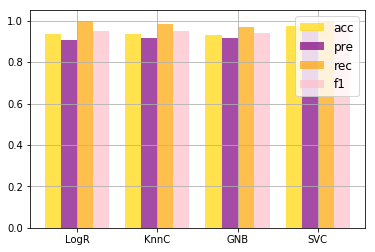

In [10]:
grupos = len(class_names2)
indice = np.arange(grupos)
bar_larg = 0.2
transp = 0.7

plt.grid()
plt.bar(indice, class2_, bar_larg, alpha=transp, color='gold', label='acc')
indice = indice + bar_larg
plt.bar(indice, class2_1, bar_larg, alpha=transp, color='purple', label='pre')
indice = indice + bar_larg
plt.bar(indice, class2_2, bar_larg, alpha=transp, color='orange', label='rec')
indice = indice + bar_larg
plt.bar(indice, class2_3, bar_larg, alpha=transp, color='pink', label='f1')

plt.xticks(indice - bar_larg * 3/2, class_names2)
plt.legend()

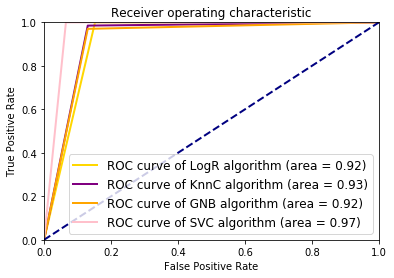

In [11]:
fpr = []
tpr = []
roc_auc = []

fpr1, tpr1, _ = m.roc_curve(y_test2, y_pred_logR)
fpr.append(fpr1)
tpr.append(tpr1)
roc_auc.append(m.auc(fpr1, tpr1))

fpr1, tpr1, _ = m.roc_curve(y_test2, y_pred_knnC)
fpr.append(fpr1)
tpr.append(tpr1)
roc_auc.append(m.auc(fpr1, tpr1))

fpr1, tpr1, _ = m.roc_curve(y_test2, y_pred_gnb)
fpr.append(fpr1)
tpr.append(tpr1)
roc_auc.append(m.auc(fpr1, tpr1))

fpr1, tpr1, _ = m.roc_curve(y_test2, y_pred_svc)
fpr.append(fpr1)
tpr.append(tpr1)
roc_auc.append(m.auc(fpr1, tpr1))

#Plotar curva ROC dos diferentes algoritmos

plt.figure()
lw = 2

colors = cycle(['gold', 'purple', 'orange', 'pink'])
for i, color in zip(range(len(class_names2)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of ' + class_names2[i] + ' algorithm (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [12]:
svc_final = svm.SVC().fit(X_cancer, y_cancer)
svc_final

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Preencha seus resultados de RMSE (para o problema de regressão) e Accuracy (para o problema de classificação) na seguinte planilha online (https://docs.google.com/spreadsheets/d/1Zkm8q3uvkL-vCpiG2M-_s-K3j_3XK8zFLDZrtTqPImk/edit#gid=0). 

Nossa primeira competiçãozinha interna!!! Tentem melhorar os resultados.